### Step 0 : Load the data

In [5]:
import pandas as pd

file_path = r"D:\gurdit singh\lab-mysql-select-en-1\cleaned_data.txt"
df = pd.read_csv(file_path)

### Step 1: check the data

In [ ]:
# Check the first rows
df.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
df.shape

(58592, 41)

In [ ]:
#check the missing values 
(df.isnull().sum())


policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

### insights:
 our data set is complete does not represent any missing values 

In [ ]:
#check duplicates 
(df.duplicated().sum())

np.int64(0)

### insights:
 our data set does not represent any duplicated rows but that is not sufficent , let's check if there is duplicated policies

In [ ]:
#check the duplicated policies 
(df.duplicated('policy_id').sum())

np.int64(0)

### insights:
 all the policies are unique and we can concider the policy_id as a unique id 

In [ ]:
#data type check 
(df.dtypes)

policy_id                            object
subscription_length                 float64
vehicle_age                         float64
customer_age                          int64
region_code                          object
region_density                        int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
steering_type                   

### insights:
the elements are correctly typed 

In [ ]:
#identify which columns are likely categorical
(df.nunique())

policy_id                           58592
subscription_length                   140
vehicle_age                            49
customer_age                           41
region_code                            22
region_density                         22
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
steering_type                           3
turning_radius                    

In [ ]:
#Invalid or extreme values
df.describe(include="all").round(2)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
count,58592,58592.00,58592.00,58592.00,58592,58592.00,58592,58592,58592,58592,...,58592,58592,58592,58592,58592,58592,58592,58592,58592.00,58592.00
unique,58592,NaN,NaN,NaN,22,NaN,6,11,3,9,...,2,2,2,2,2,2,2,2,NaN,NaN
top,POL020760,NaN,NaN,NaN,C8,NaN,B2,M1,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,13654,NaN,18314,14948,20532,17796,...,32177,42435,42435,57383,34291,36309,42435,58229,NaN,NaN
mean,NaN,6.11,1.39,44.82,NaN,18826.86,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.76,0.06
std,NaN,4.14,1.13,6.94,NaN,17660.17,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.39,0.24
min,NaN,0.00,0.00,35.00,NaN,290.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
25%,NaN,2.10,0.40,39.00,NaN,6112.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
50%,NaN,5.70,1.20,44.00,NaN,8794.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00
75%,NaN,10.40,2.20,49.00,NaN,27003.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,0.00


### insights:
Since the minimum value of car age is 0, this indicates that the dataset includes cars that are brand new or not yet in use

The minimum subscription length is 0, which indicates that some contracts have not been activated yet

the claim_status column is showing Nan unique values , but according to the (df.nunique()) function there is 2 uniques values 1 and 0 

In [ ]:
# check how many cars are not in use 
not_in_use_cars = (df['vehicle_age'] == 0).sum()
print(f'There are {not_in_use_cars} cars that are not in use.')
# check what is the percentage of the not in use cars
percentage_not_in_use_cars = (((not_in_use_cars / df.shape[0])*100).round(2))
print(f'the percentage of the not in use cars is {percentage_not_in_use_cars}')

There are 5257 cars that are not in use.
the percentage of the not in use cars is 8.97


In [ ]:
#let's investiate more about the unused cars to make they are really unused 
df[df['vehicle_age'] == 0].head(10)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
13,POL002844,1.4,0.0,44,C2,27003,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
25,POL050788,1.3,0.0,46,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
28,POL028528,0.7,0.0,37,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
31,POL039202,7.7,0.0,45,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
47,POL025380,2.7,0.0,49,C3,4076,Utility,M10,CNG,85Nm@3000rpm,...,No,No,No,No,No,No,No,Yes,0,0
61,POL013657,0.6,0.0,49,C13,5410,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
84,POL043686,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
87,POL048143,0.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
103,POL036840,5.7,0.0,40,C12,34791,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
106,POL035335,0.8,0.0,54,C10,73430,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


### insights 
some of the not used cars or brand new cars filled a claim , they have valid and active policy and real owners 

these cars are not invalid data they are legitimate new vehicles and a segment to include in the EDA 

In [ ]:
# check how many subscription are not activated yet 
not_activated_policies = (df['subscription_length'] == 0).sum()
print(f'There are {not_activated_policies} subscriptions that are not activated yet.')
# check what is the percentage of these policies
percentage_not_activated_policies = (((not_activated_policies/ df.shape[0])*100).round(2))
print(f'the percentage of the not activated policies is {percentage_not_activated_policies}')

There are 276 subscriptions that are not activated yet.
the percentage of the not activated policies is 0.47


In [ ]:
#let's investiate more about the not activated policies to make they are really not activated
df[df['subscription_length'] == 0].head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
149,POL051694,0.0,0.8,47,C13,5410,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1493,POL001560,0.0,0.0,39,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1513,POL011444,0.0,2.6,40,C13,5410,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0
2028,POL034031,0.0,2.4,39,C13,5410,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
2165,POL033834,0.0,0.0,45,C15,290,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0


### insights 



In [ ]:
df['subscription_length'].describe()

count    58592.000000
mean         6.111688
std          4.142790
min          0.000000
25%          2.100000
50%          5.700000
75%         10.400000
max         14.000000
Name: subscription_length, dtype: float64

### step 4 : cleaning the dataset 

In [ ]:
#delete the unnecessairy columns 
df_new = df.drop(['segment', 'max_torque', 'transmission_type','steering_type','turning_radius','gross_weight','is_front_fog_lights','is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_power_steering'], axis=1)
display(df_new["rear_brakes_type"])

0        Disc
1        Drum
2        Disc
3        Drum
4        Drum
         ... 
58587    Drum
58588    Disc
58589    Drum
58590    Drum
58591    Drum
Name: rear_brakes_type, Length: 58592, dtype: object

In [ ]:
from pathlib import Path

file_path = Path("data") / "cleaned_data.csv"
file_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(file_path, index=False)

In [ ]:
#import the new dataset
import pandas as pd

file_path = r"C:\Users\tlili\OneDrive\Bureau\Bootcamp\labs\project-2-eda-sql-insurance\data\cleaned_data.csv"
df_cleaned = pd.read_csv(file_path)

In [ ]:
df_cleaned. columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

##### To make the analyse of the car and customer age easier we will add new columns 'vehicle_age_group', 'driver_age_group'

In [ ]:
# modifies df_cleaned in-place (adds columns)
df_cleaned['driver_age_group'] = pd.cut(
    df_cleaned['customer_age'],
    bins=[0, 25, 40, 60, 100],
    labels=['<25', '25-40', '40-60', '60+']
)

df_cleaned['vehicle_age_group'] = pd.cut(
    df_cleaned['vehicle_age'],
    bins=[0, 1, 3, 5, 10, 20],
    labels=['<1', '1-3', '3-5', '5-10', '10+']

)

In [ ]:
df_cleaned. columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status',
       'driver_age_group', 'vehicle_age_group'],
      dtype='object')

### Step 4: Univariable EDA 

#### 4.1 : Vehicle age Vs claim rate 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data/cleaned_data.csv")
df["vehicle_age"]
df["claim_status"]

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: claim_status, Length: 58592, dtype: int64

In [ ]:
age_claim_rate = (
    df.groupby(df["vehicle_age"].round().astype("Int64"))["claim_status"]
      .agg(claim_rate="mean", number_cars="count")
      .reset_index()
      .sort_values("vehicle_age")
)

age_claim_rate

,vehicle_age,claim_rate,number_cars
0,0,0.069431,16808
1,1,0.066319,17461
2,2,0.065085,13444
3,3,0.052358,8652
4,4,0.045480,1803
5,5,0.027559,254
6,6,0.025641,117
7,7,0.100000,30
8,8,0.000000,10
9,9,0.000000,5


In [ ]:
if "age_group" in df.columns:
    df = df.drop(columns=["age_group"])

# create labels
label_0_2 = (df["vehicle_age"] <= 2) & (df["vehicle_age"] >= 0)
label_3_5 = (df["vehicle_age"] > 2) & (df["vehicle_age"] <= 5)
label_6_8 = (df["vehicle_age"] > 5) & (df["vehicle_age"] <= 8)
label_9plus = (df["vehicle_age"] > 8)

# label asigned 
df.loc[label_0_2, "age_group"] = "0–2"
df.loc[label_3_5, "age_group"] = "3–5"
df.loc[label_6_8, "age_group"] = "6–8"
df.loc[label_9plus, "age_group"] = "9+"

# see the result
print(df["age_group"].value_counts(dropna=False))

age_group
0–2    42765
3–5    15604
6–8      209
9+        14
Name: count, dtype: int64


<Axes: xlabel='age_group', ylabel='claim_rate'>

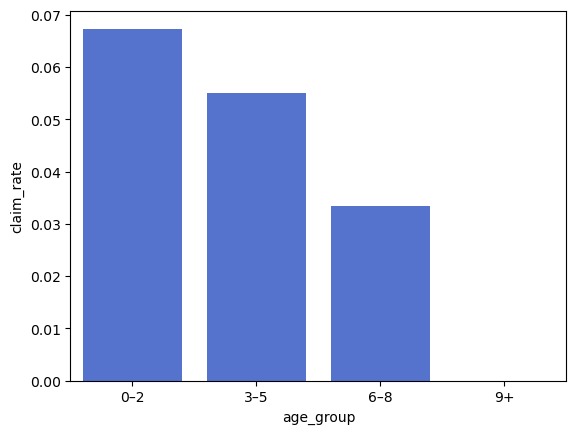

In [ ]:
age_group_rate = (
    df.groupby("age_group", observed=True)["claim_status"]
      .agg(claim_rate="mean", n="count")
      .reset_index()
)
age_group_rate

sns.barplot(
    data=age_group_rate,
    x="age_group",
    y="claim_rate",
    color="royalblue"
)


#### insights :

A clear decrease in the claim rate is observed as the vehicle gets older.

Vehicles aged 0–2 years have the highest claim rate (~6.7%), while those older than 6 years show almost no claims.

This suggests that:

Newer cars tend to have more claims, probably because owners of new vehicles usually have comprehensive insurance coverage and are more willing to file claims.

As vehicles age, owners may switch to basic insurance plans or choose not to claim minor damages.

 *Conclusion: there is a strong negative relationship between vehicle age and claim rate.


#### 4.2 : distribution age Vs claim 

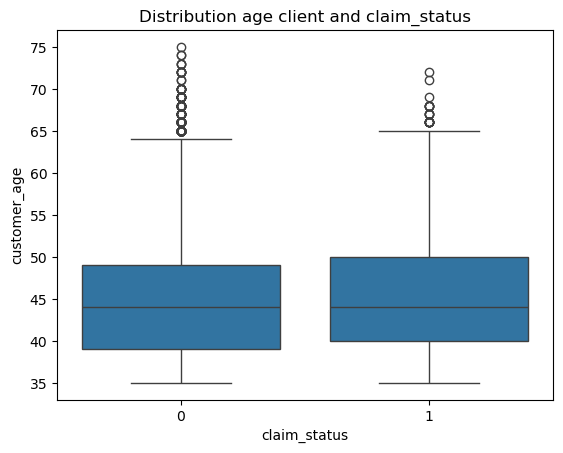

In [ ]:
sns.boxplot(x="claim_status", y="customer_age", data=df)
plt.title("Distribution age client and claim_status")
plt.show()

#### insights 

The boxplot shows that the age distributions of customers with and without claims are quite similar.
However, the group with claims tends to be slightly older (the median age is a bit higher).

This aligns with the previous analysis, where customers over 55 years old showed higher claim rates.

* Conclusion: customer age has a mild effect older customers tend to claim more often, but the difference is not very pronounced.


#### 4.3 : NCAP Vs claim 

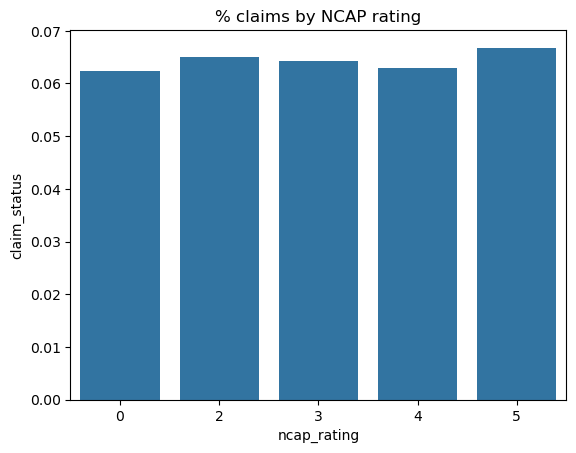

In [ ]:
claim_by_ncap = df.groupby("ncap_rating")["claim_status"].mean().reset_index()
sns.barplot(x="ncap_rating", y="claim_status", data=claim_by_ncap)
plt.title("% claims by NCAP rating")
plt.show()

#### insights 

The claim rates are very similar across all NCAP values (0 to 5).

No clear trend is observed (neither increasing nor decreasing).

* Conclusion: the NCAP safety rating is not significantly associated with claim frequency.
This could be because NCAP measures the vehicle’s passive safety, not the risk of an accident or the driver’s tendency to file a claim.

#### 4.4 : fuel type Vs claim 

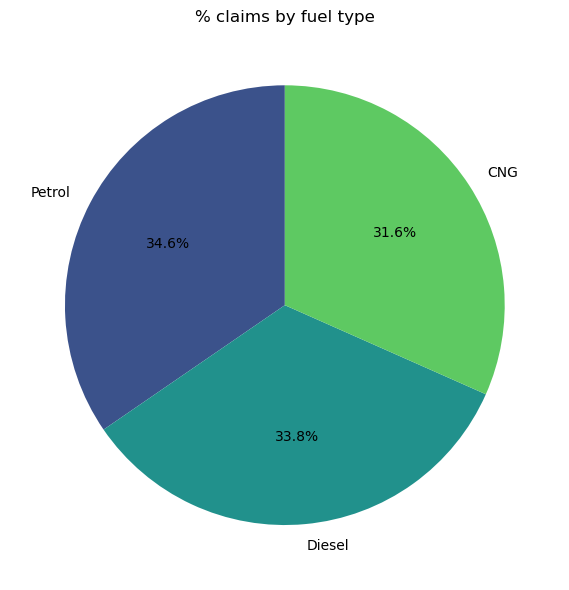

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Average claim rate by fuel type
claim_rate_by_fuel = (
    df.groupby('fuel_type')['claim_status']
    .mean()
    .reset_index()
    .sort_values('claim_status', ascending=False)
)
claim_rate_by_fuel

plt.figure(figsize=(6, 6))
plt.pie(
    claim_rate_by_fuel['claim_status'],
    labels=claim_rate_by_fuel['fuel_type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(claim_rate_by_fuel))
)
plt.title('% claims by fuel type')
plt.tight_layout()
plt.show()

### Step 5: Bivariate EDA (Two Variables at a Time)

#### 5.0: Pre-work 

We will select the safty features and split them into categorical and numerical ones 

In [ ]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np

In [ ]:
#import the data 
dataset_path = kagglehub.dataset_download("litvinenko630/insurance-claims")
df = pd.read_csv(f"{dataset_path}/Insurance claims data.csv")

In [ ]:
# select teh safety features 
safety_features = df[["is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","steering_type","turning_radius","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger","is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating","claim_status"]]
safety_features.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,is_front_fog_lights,is_rear_window_wiper,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,No,Yes,No,Yes,Yes,Drum,Electric,4.9,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,No,No,No,Yes,No,Drum,Power,4.6,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
4,No,Yes,No,Yes,No,Drum,Electric,5.0,No,No,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [ ]:
cat = safety_features.select_dtypes(exclude= "number")
num = safety_features.select_dtypes(include= "number")

#### 5.0: Pre-work 

We convert the categorical data to numerical ( makes the correlation analyses easier)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Simple encoding - same number of columns as original
safety_features_encoded = safety_features.copy()

# Apply LabelEncoder to categorical columns only
for col in cat.columns:
    le = LabelEncoder()
    safety_features_encoded[col] = le.fit_transform(safety_features_encoded[col])

In [ ]:
# calculate the correlation 
safety_features_encoded.corr()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,is_front_fog_lights,is_rear_window_wiper,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
is_esc,1.000000,0.517896,0.828793,0.139016,0.845105,-0.828793,0.276548,0.788425,0.549875,0.943207,...,0.613068,0.417517,0.417517,0.098215,0.569611,-0.225575,0.417517,-0.116688,0.361063,0.002995
is_adjustable_steering,0.517896,1.000000,0.451872,0.254973,0.449247,-0.451872,-0.476923,0.674918,0.945062,0.514252,...,0.863840,0.765782,0.765782,0.180139,0.931436,0.460479,0.765782,0.097987,0.645792,0.013917
is_tpms,0.828793,0.451872,1.000000,0.115215,0.700417,-1.000000,0.480278,0.853530,0.478140,0.878697,...,0.508107,0.346035,0.346035,0.081400,0.472089,-0.439321,0.346035,0.044278,0.500452,0.000703
is_parking_sensors,0.139016,0.254973,0.115215,1.000000,-0.256603,-0.115215,0.245090,-0.132524,0.240965,0.131120,...,0.226754,-0.126773,-0.126773,-0.029821,0.244054,-0.262257,-0.126773,-0.016221,-0.035492,0.008419
is_parking_camera,0.845105,0.449247,0.700417,-0.256603,1.000000,-0.700417,0.075838,0.818859,0.488793,0.797109,...,0.409982,0.494042,0.494042,0.116216,0.505523,-0.014231,0.494042,-0.098614,0.477036,-0.000871
rear_brakes_type,-0.828793,-0.451872,-1.000000,-0.115215,-0.700417,1.000000,-0.480278,-0.853530,-0.478140,-0.878697,...,-0.508107,-0.346035,-0.346035,-0.081400,-0.472089,0.439321,-0.346035,-0.044278,-0.500452,-0.000703
steering_type,0.276548,-0.476923,0.480278,0.245090,0.075838,-0.480278,1.000000,0.049670,-0.406051,0.319825,...,-0.305731,-0.481143,-0.481143,0.024423,-0.396132,-0.934540,-0.481143,-0.067620,-0.196605,-0.009608
turning_radius,0.788425,0.674918,0.853530,-0.132524,0.818859,-0.853530,0.049670,1.000000,0.632248,0.801551,...,0.625850,0.704485,0.704485,0.224604,0.647198,-0.053278,0.704485,-0.085550,0.779302,0.002724
is_front_fog_lights,0.549875,0.945062,0.478140,0.240965,0.488793,-0.478140,-0.406051,0.632248,1.000000,0.544147,...,0.915803,0.723712,0.723712,0.170243,0.987346,0.498954,0.723712,0.092604,0.510252,0.011825
is_rear_window_wiper,0.943207,0.514252,0.878697,0.131120,0.797109,-0.878697,0.319825,0.801551,0.544147,1.000000,...,0.578250,0.393805,0.393805,0.092637,0.537261,-0.272050,0.393805,0.050390,0.330660,0.002651


#### 5.0: Pre-work 

We add weights to all the columns to see which are more relevant then the others 

In [ ]:

# Basic statistics
print("\nClaim Rate Overall:", df['claim_status'].mean())


Claim Rate Overall: 0.06396777717094485


In [ ]:
from scipy import stats

# Get only numeric columns from safety_features

numeric_features = safety_features_encoded.select_dtypes(include='number').columns.tolist()

# Remove claim_status if it's in the list
if 'claim_status' in numeric_features:
    numeric_features.remove('claim_status')


correlations = {}
statistical_relevant = {}
for feature in numeric_features:
    if feature in safety_features_encoded.columns:
        corr, p_val = stats.pearsonr(safety_features_encoded[feature], safety_features_encoded['claim_status'])
        correlations[feature] = {'correlation': abs(corr), 'p_value': p_val}

        # save statistical relevant columns (p-value < 0.05)

        if p_val < 0.05:  
            statistical_relevant[feature] = abs(corr)

# Create weights series

weights = pd.Series(correlations)

print(weights)

is_esc                              {'correlation': 0.002994834883252873, 'p_value...
is_adjustable_steering              {'correlation': 0.013916612183608934, 'p_value...
is_tpms                             {'correlation': 0.0007029561818992087, 'p_valu...
is_parking_sensors                  {'correlation': 0.008419358859162077, 'p_value...
is_parking_camera                   {'correlation': 0.0008712615419068318, 'p_valu...
rear_brakes_type                    {'correlation': 0.0007029561818992087, 'p_valu...
steering_type                       {'correlation': 0.009608029479370174, 'p_value...
turning_radius                      {'correlation': 0.002724222929158924, 'p_value...
is_front_fog_lights                 {'correlation': 0.01182483421324191, 'p_value'...
is_rear_window_wiper                {'correlation': 0.00265069421198039, 'p_value'...
is_rear_window_washer               {'correlation': 0.00265069421198039, 'p_value'...
is_rear_window_defogger             {'correlation': 0.

#### 5.0: Pre-work 

sort the weights and visualize the top 5 safety features 

C:\Users\tlili\AppData\Local\Temp\ipykernel_17748\1789456195.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")


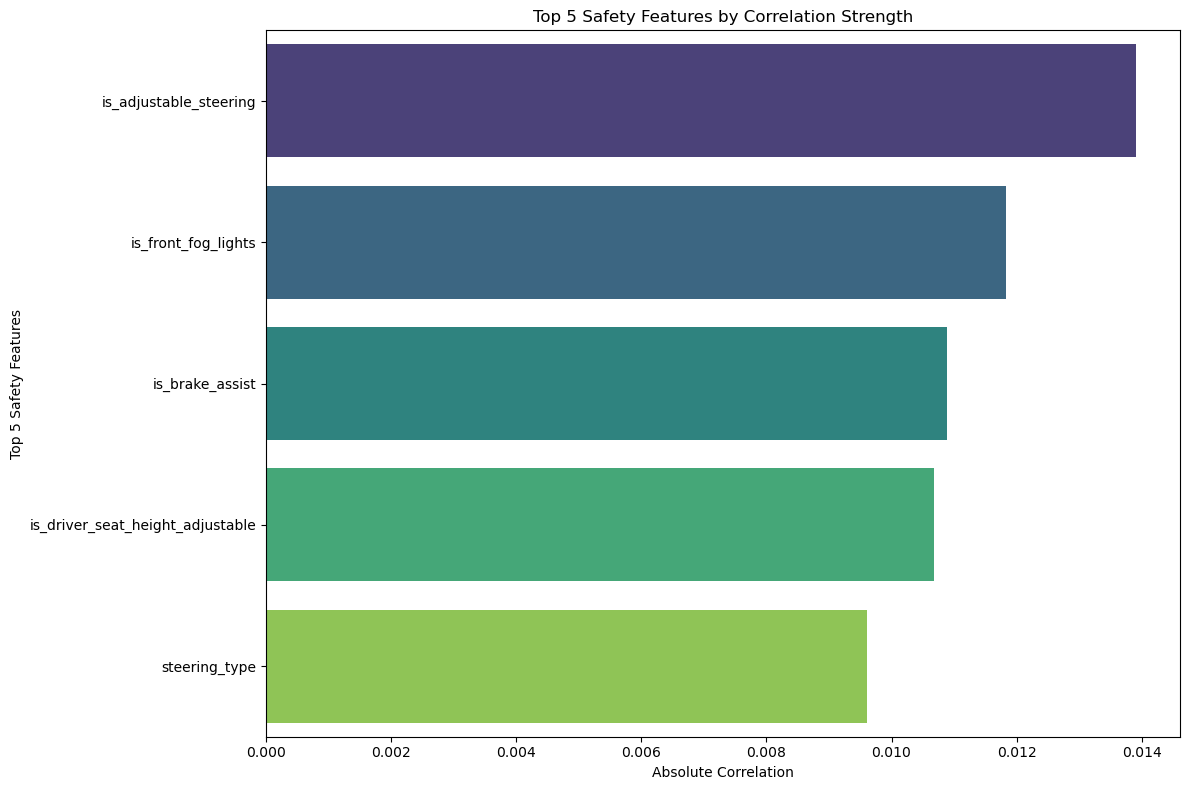

In [ ]:
del plt
import matplotlib.pyplot as plt
#visualize the top 5 safety features 
plt.figure(figsize=(12,8))

# First, sort the weights by correlation strength
weights_sorted = weights.sort_values(key=lambda x: x.apply(lambda y: y['correlation']), ascending=False)

# Extract correlation values from the TOP 15 (now sorted)
correlation_values = [weights_sorted[feature]['correlation'] for feature in weights_sorted.index[:5]]
feature_names = weights_sorted.index[:5]

sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")
plt.xlabel("Absolute Correlation")
plt.ylabel("Top 5 Safety Features")
plt.title("Top 5 Safety Features by Correlation Strength")
plt.tight_layout()
plt.show()


#### 5.0: Pre-work
check which of all the features are the ones affecting the most the claim status

In [ ]:
# sepparate all columns in two axis X(all features) and y(the claim status)
columns_to_remove = ['policy_id', 'claim_status']
X = df.drop(columns=columns_to_remove)
y = df['claim_status']

In [ ]:
# Separate categorical and numerical features from X to convert them all to numerical 
cat_all = X.select_dtypes(exclude="number")
num_all = X.select_dtypes(include="number")

# This will give you the SAME number of columns as original
for col in cat_all.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
from scipy import stats

# Calculate correlation between X and Y AND p-values

feature_analysis = {}
for column in X.columns:
    corr, p_val = stats.pearsonr(X[column], y)
    feature_analysis[column] = {
        'correlation': corr,
        'abs_correlation': abs(corr),
        'p_value': p_val,
        'significant': p_val < 0.05
    }

# Convert to DataFrame for easier viewing
results_df = pd.DataFrame(feature_analysis).T
results_df = results_df.sort_values('abs_correlation', ascending=False)

print(results_df)

                                 correlation abs_correlation   p_value  \
subscription_length                 0.078738        0.078738       0.0   
vehicle_age                        -0.028172        0.028172       0.0   
customer_age                        0.022234        0.022234       0.0   
region_density                     -0.017808        0.017808  0.000016   
max_torque                          -0.01439         0.01439  0.000495   
is_adjustable_steering              0.013917        0.013917  0.000755   
cylinder                            0.013434        0.013434  0.001147   
is_front_fog_lights                 0.011825        0.011825  0.004205   
is_brake_assist                     0.010893        0.010893   0.00837   
is_driver_seat_height_adjustable    0.010686        0.010686  0.009692   
width                               0.009947        0.009947   0.01605   
fuel_type                           0.009612        0.009612  0.019989   
steering_type                      -0.

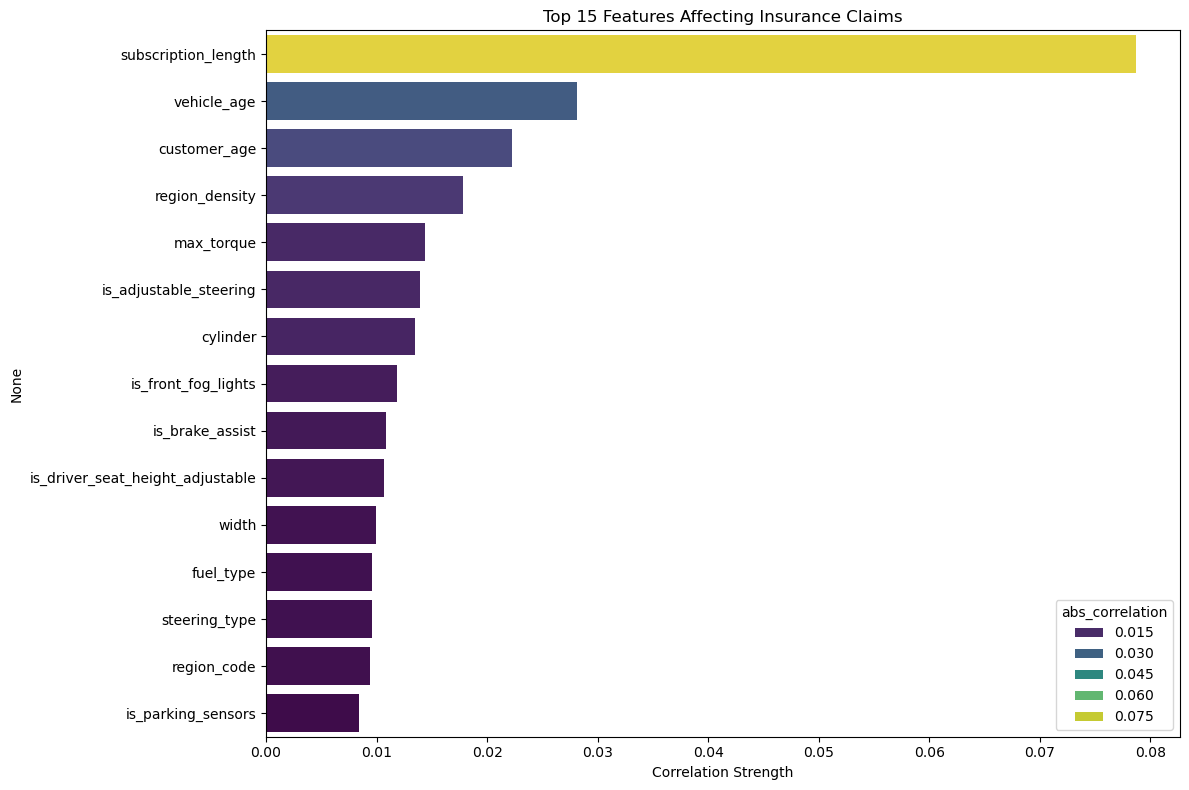

In [ ]:
#visualize the top 15 features that impacts the claim rate 
plt.figure(figsize=(12, 8))

top_features = results_df.head(15)
sns.barplot(x=top_features['abs_correlation'], y=top_features.index, hue=top_features['abs_correlation'], palette='viridis')
plt.xlabel('Correlation Strength')
plt.title('Top 15 Features Affecting Insurance Claims')
plt.tight_layout()
plt.show()

### insights : 
the duration a customer stays insured is a major indicator of whether they are likely to make a claim


#### 5.0: Pre-work
claim Vs subscription length 

In [ ]:
# Calculate claim rate (%)
claim_by_subscription = (
    df_cleaned.groupby('subscription_group')['claim_status']
    .mean()
    .mul(100)
    .reset_index()
    .rename(columns={'claim_status': 'Claim Rate (%)'})
)

# Visualize
plt.figure(figsize=(7,5))
sns.barplot(
    data=claim_by_subscription,
    x='subscription_group',
    y='Claim Rate (%)',
    palette="YlOrRd"
)
plt.title("Claim Rate by Subscription Length")
plt.xlabel("Subscription Length Group")
plt.ylabel("Claim Rate (%)")
plt.tight_layout()
plt.show()

# Display table for clarity
claim_by_subscription



KeyError: 'subscription_group'

### insights :
Customers with subscriptions under 1 year have a lower claim rate than those with 1–3 year subscriptions.
However, beyond 3 years of subscription, no claims are recorded at all.

new customers are still cautious or have not yet faced claim-triggering situations, while mid-term customers exhibit slightly riskier behavior or more exposure.

After the 3-year mark, the absence of claims suggests a strong self-selection or retention effect customers who remain insured for several years tend to be low-risk, stable profiles whom the insurer likely aims to retain

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

df = df_cleaned.copy()  


#### 5.1: Customer age Vs vehicule age 

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

df = df_cleaned.copy()  

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\779854226.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['driver_age_group', 'vehicle_age_group'])['claim_status']


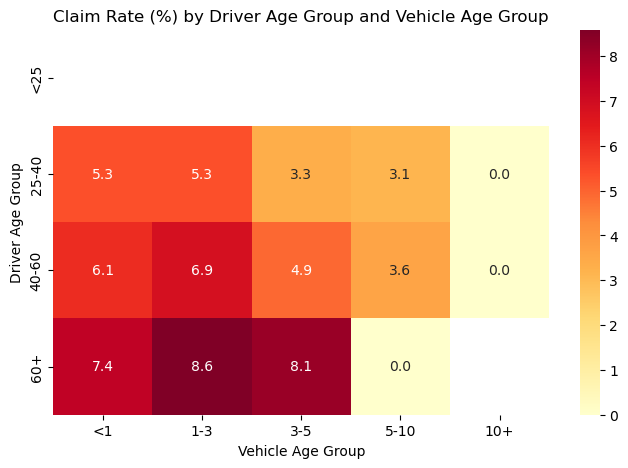

In [ ]:
# Step 1: Compute claim rate by both groups
claim_rate = (
    df_cleaned
    .groupby(['driver_age_group', 'vehicle_age_group'])['claim_status']
    .mean()
    .unstack() * 100
)

# Step 2: Visualize as heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(claim_rate, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Claim Rate (%) by Driver Age Group and Vehicle Age Group")
plt.ylabel("Driver Age Group")
plt.xlabel("Vehicle Age Group")
plt.show()


### insights : 

In this dataset, older drivers (60+) show the highest claim rates, even when driving newer vehicles (1 to 3 years old), whereas younger and middle-aged drivers maintain lower claim rates overall and that even with old vehiculs (5 to 10 years old).

This suggests that driver age is a stronger determinant of claim probability than vehicle age.


Missing or zero claim data for very old cars (10+ years) suggests either :

There are few or no policies for cars older than 10 years, or sample size too small to show true pattern.

In [ ]:
# Count number of policies per vehicle age group to investigate the missing data for cars older then 10 years 

df_cleaned['vehicle_age_group'] = pd.cut(
    df_cleaned['vehicle_age'],
    bins=[0, 1, 3, 5, 10, 20],
    labels=['<1', '1-3', '3-5', '5-10', '10+']
)

# Optional sanity check
df_cleaned['vehicle_age_group'].value_counts()

vehicle_age_group
1-3     25815
<1      23071
3-5      4226
5-10      217
10+         6
Name: count, dtype: int64

#### insights:
 it is now proved that the sample size for cars older then 10 years old is too small to show true pattern


##### 5.2 :Vehicle Age Vs Fuel Type

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\3785645628.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='vehicle_age_group', y='claim_status', hue='fuel_type', ci=None)


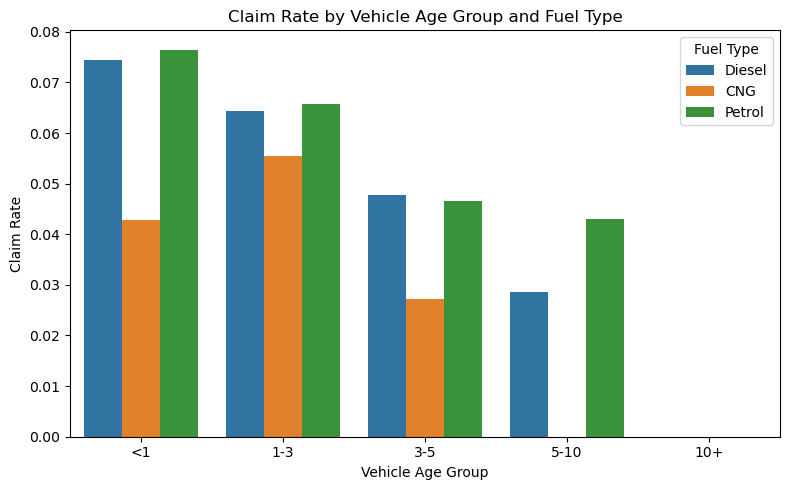

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_cleaned, x='vehicle_age_group', y='claim_status', hue='fuel_type', ci=None)
plt.title("Claim Rate by Vehicle Age Group and Fuel Type")
plt.ylabel("Claim Rate")
plt.xlabel("Vehicle Age Group")
plt.legend(title="Fuel Type")
plt.tight_layout()
plt.show()


#### insights 

clearly petrol vehiculs have the highest claim rate regardless of the vehicule age 

#### 5.3 :Driver Age Vs Region Density

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\1321274450.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


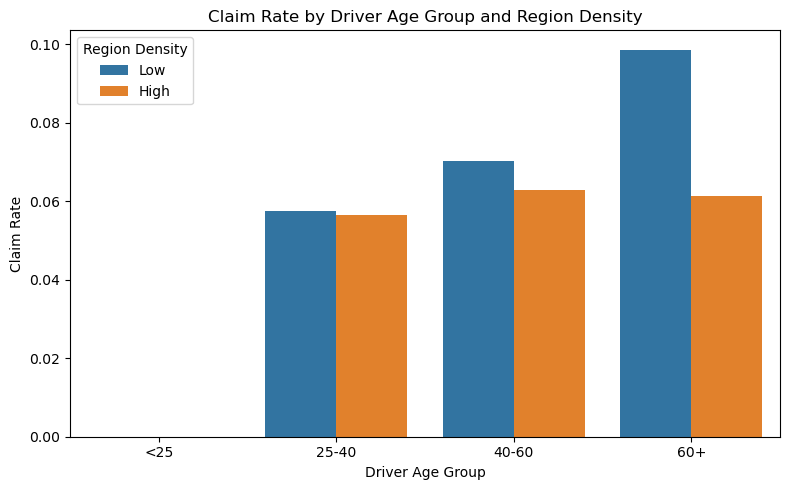

In [ ]:
# Define two bins: Low and High
df_cleaned['region_density_group'] = pd.cut(
    df_cleaned['region_density'],
    bins=[-1, df_cleaned['region_density'].median(), df_cleaned['region_density'].max()],
    labels=['Low', 'High']
)

# Optional: check counts
df_cleaned['region_density_group'].value_counts()


plt.figure(figsize=(8,5))
sns.barplot(
    data=df_cleaned,
    x='driver_age_group',
    y='claim_status',
    hue='region_density_group',
    ci=None
)
plt.title("Claim Rate by Driver Age Group and Region Density")
plt.ylabel("Claim Rate")
plt.xlabel("Driver Age Group")
plt.legend(title="Region Density")
plt.tight_layout()
plt.show()


#### insights 
Low-density areas often mean rural or suburban roads where vehicles can travel faster, which can lead to more severe accidents when they occur.

Rural roads may have poorer lighting, fewer traffic signs, narrow roads, or longer distances, increasing accident likelihood.

Drivers may be less cautious compared to congested urban areas where traffic is slow and accidents tend to be minor.

#### 5.4 : safety options Vs claim rate 
       
    
                 

 we choose 5 safety options ( parking camera , parking sensor ,is_front_fog_lights ,is_driver_seat_height_adjustable and speed alert) and study their impact on the claim risk 

for that We create a categorical column representing whether a car has:

None 
Few (1-2)  
Moderate (3-4)       
All (5)  

In [ ]:
# Define all safety-related columns
safety_cols = [
    'is_parking_camera',
    'is_parking_sensors',
    'is_speed_alert',
    'is_front_fog_lights',
    'is_driver_seat_height_adjustable'
]

# Convert each column to numeric 0/1
for col in safety_cols:
    df_cleaned[col] = (
        df_cleaned[col]
        .astype(str)  # ensure string
        .str.strip()
        .str.lower()
        .map({
            'yes': 1, 'true': 1, '1': 1,
            'no': 0, 'false': 0, '0': 0
        })
        .fillna(0)  # if missing, assume 0
        .astype(int)
    )





In [ ]:
# Count how many of the 5 features each car has
safety_cols = [
    'is_parking_camera',
    'is_parking_sensors',
    'is_speed_alert',
    'is_front_fog_lights',
    'is_driver_seat_height_adjustable'
]

df_cleaned['safety_feature_count'] = df_cleaned[safety_cols].sum(axis=1)

# Add readable group names
df_cleaned['safety_feature_group'] = pd.cut(
    df_cleaned['safety_feature_count'],
    bins=[-1, 0, 2, 4, 5],
    labels=['None', 'Few (1-2)', 'Moderate (3-4)', 'All (5)']
)

# Check group sizes
df_cleaned['safety_feature_group'].value_counts()




safety_feature_group
Few (1-2)         24301
All (5)           20152
Moderate (3-4)    14139
None                  0
Name: count, dtype: int64

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\843458793.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


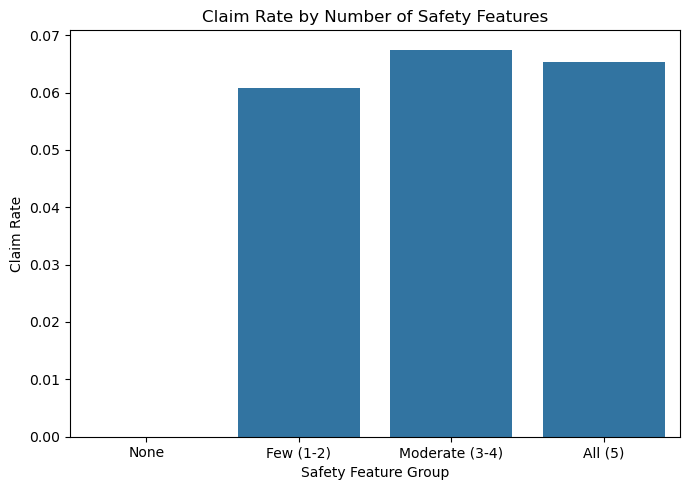

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=df_cleaned,
    x='safety_feature_group',
    y='claim_status',
    ci=None,
    order=['None', 'Few (1-2)', 'Moderate (3-4)', 'All (5)']
)
plt.title("Claim Rate by Number of Safety Features")
plt.ylabel("Claim Rate")
plt.xlabel("Safety Feature Group")
plt.tight_layout()
plt.show()


#### insights 
The overall claim rate by safety feature group initially appeared inconsistent ,vehicles with all available safety features showed higher claim rates than those with fewer features , let's check the customer age Vs safety options 

#### 5.5 : customer age Vs safety options 

C:\Users\tlili\AppData\Local\Temp\ipykernel_18336\3412166848.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


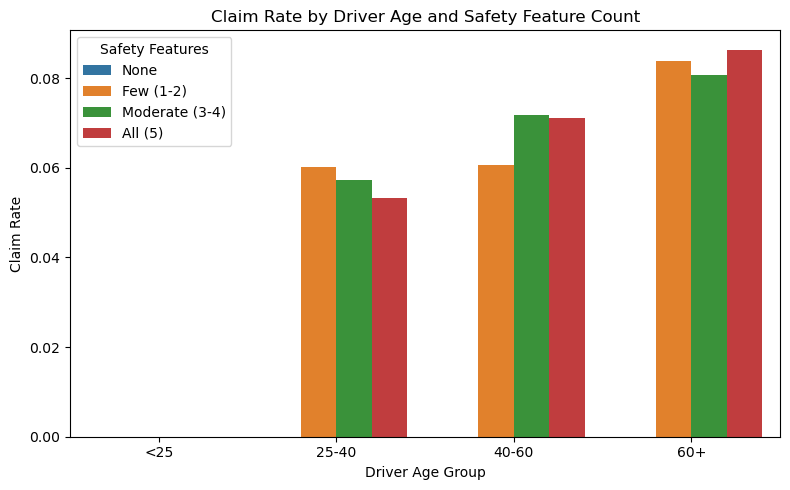

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_cleaned,
    x='driver_age_group',
    y='claim_status',
    hue='safety_feature_group',
    ci=None,
    order=['<25','25-40','40-60','60+']
)
plt.title("Claim Rate by Driver Age and Safety Feature Count")
plt.ylabel("Claim Rate")
plt.xlabel("Driver Age Group")
plt.legend(title="Safety Features")
plt.tight_layout()
plt.show()


#### insights : 

Young drivers with few safety options tend to file more claims, likely due to inexperience and riskier driving behavior.

When these drivers have cars equipped with advanced safety systems their claim rates drop significantly, suggesting the technology helps mitigate their risk.


Interestingly, for older drivers, even vehicles with full safety packages show higher claim rates. that confirms that age is more determinant then safety options for older customers 

#### 4.0 : Data distribution 

#### 4.0.1 : customer age distribution

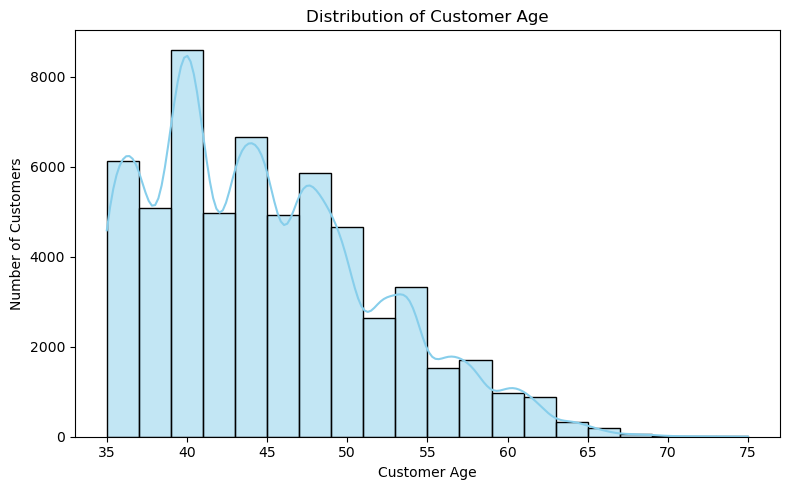

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['customer_age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

#### 4.0.2 : customer age skewness mesure

In [ ]:
from scipy.stats import skew, mode
import numpy as np

age_data = df_cleaned['customer_age'].dropna()

mean_age = age_data.mean()
median_age = age_data.median()
mode_age = age_data.mode()[0]
skewness = skew(age_data)

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age:.2f}")
print(f"Mode Age: {mode_age:.2f}")
print(f"Skewness: {skewness:.2f}")


Mean Age: 44.82
Median Age: 44.00
Mode Age: 40.00
Skewness: 0.66


#### insights : 

The average policyholder is about 45 years old

Half of all customers are younger than 44, half older indicating a fairly centered age spread

The most common age group in the dataset is around 40 years old

The distribution is positively skewed, meaning there are more younger and middle-aged customers, with a longer tail of older ages

the dataset is not dominated by older clients  instead, it’s relatively balanced with a slight tilt toward younger drivers 

This means the age–risk relationship is real, not just an artifact of who’s in our dataset Even though there are fewer older policyholders, they still account for a disproportionate share of claims, confirming that age is a genuine behavioral risk factor

## Final Summary

#### The Highest-risk profiles are :

Older drivers (40+) living in low-density regions, driving petrol vehicles, even when equipped with full safety features.

Young drivers without safety options. 

#### The Lower-risk profiles:

Younger drivers with modern vehicles equipped with multiple safety systems.

#### the insurer can leverage this insight to:


Price policies more accurately higher premiums for new/short-term clientscustomers.

Reward long-term policyholders through loyalty discounts, as they represent lower risk.
